In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

In [ ]:
!unzip pizza_steak.zip

Archive:  pizza_steak.zip
   creating: pizza_steak/
   creating: pizza_steak/test/
   creating: pizza_steak/train/
   creating: pizza_steak/test/steak/
   creating: pizza_steak/test/pizza/
   creating: pizza_steak/train/steak/
   creating: pizza_steak/train/pizza/
  inflating: pizza_steak/test/steak/413497.jpg  
  inflating: pizza_steak/test/steak/2246332.jpg  
  inflating: pizza_steak/test/steak/2649745.jpg  
  inflating: pizza_steak/test/steak/2382600.jpg  
  inflating: pizza_steak/test/steak/296375.jpg  
  inflating: pizza_steak/test/steak/2484823.jpg  
  inflating: pizza_steak/test/steak/400951.jpg  
  inflating: pizza_steak/test/steak/285269.jpg  
  inflating: pizza_steak/test/steak/2475366.jpg  
  inflating: pizza_steak/test/steak/1982192.jpg  
  inflating: pizza_steak/test/steak/2071320.jpg  
  inflating: pizza_steak/test/steak/2353677.jpg  
  inflating: pizza_steak/test/steak/2921355.jpg  
  inflating: pizza_steak/test/steak/3297938.jpg  
  inflating: pizza_steak/test/steak/116

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Activation, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.callbacks import LearningRateScheduler
import numpy as np


In [ ]:
test_dir = '/content/pizza_steak/test'
train_dir = '/content/pizza_steak/train'

In [ ]:
generator = ImageDataGenerator()

In [ ]:
train_images = generator.flow_from_directory(directory=train_dir,
                                             class_mode='binary',
                                             target_size=(224, 224),
                                             batch_size=32,
                                             seed=42)
test_images = generator.flow_from_directory(directory=test_dir,
                                             class_mode='binary',
                                             target_size=(224, 224),
                                             batch_size=32,
                                             seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
model = Sequential([
    Conv2D(10, 3, 1, 'same', input_shape=(224,224,3)),
    Activation('relu'),
    MaxPool2D(2),
    Conv2D(10, 3,),
    Activation('relu'),
    MaxPool2D(2),
    Conv2D(10, 3,),
    Activation('relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(1, 'sigmoid'),
])

model.compile(loss=binary_crossentropy,
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

history = model.fit(train_images,
          epochs=5,
          steps_per_epoch=len(train_images),
          validation_data=test_images,
          validation_steps=len(test_images),
          )

Epoch 1/5
47/47 [==============================] - 23s 230ms/step - loss: 3.2616 - accuracy: 0.5753 - val_loss: 0.9442 - val_accuracy: 0.6320
Epoch 2/5
47/47 [==============================] - 10s 211ms/step - loss: 0.7928 - accuracy: 0.6700 - val_loss: 0.7579 - val_accuracy: 0.6760
Epoch 3/5
47/47 [==============================] - 10s 215ms/step - loss: 0.5342 - accuracy: 0.7353 - val_loss: 0.7436 - val_accuracy: 0.6900
Epoch 4/5
47/47 [==============================] - 11s 226ms/step - loss: 0.4357 - accuracy: 0.8033 - val_loss: 0.7077 - val_accuracy: 0.7080
Epoch 5/5
47/47 [==============================] - 11s 229ms/step - loss: 0.3160 - accuracy: 0.8633 - val_loss: 0.7318 - val_accuracy: 0.7140


In [ ]:
model.evaluate(test_images)

16/16 [==============================] - 3s 189ms/step - loss: 0.7318 - accuracy: 0.7140


[0.7317702174186707, 0.7139999866485596]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 10)      280       
                                                                 
 activation (Activation)     (None, 224, 224, 10)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 10)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 10)      910       
                                                                 
 activation_1 (Activation)   (None, 110, 110, 10)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 10)       0         
 2D)                                                    

In [ ]:
import pandas as pd

<Axes: >

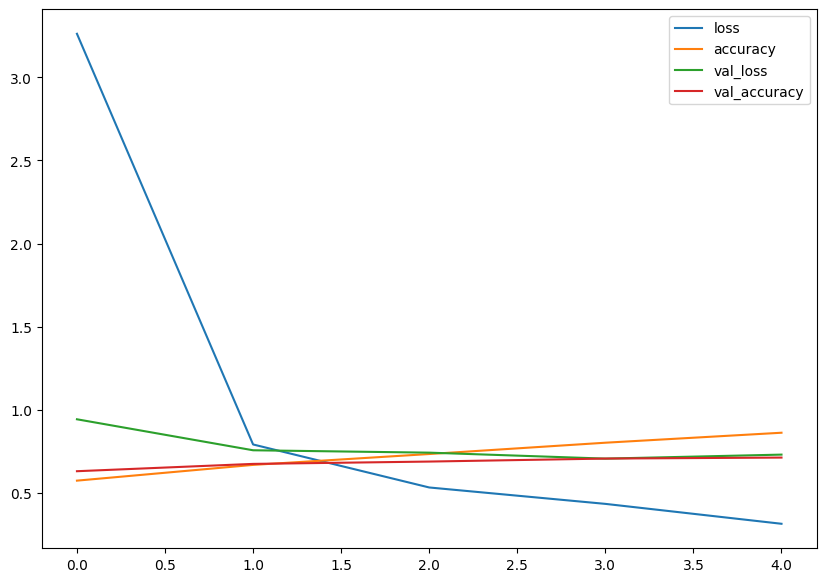

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10, 7))

In [ ]:
hist = history.history

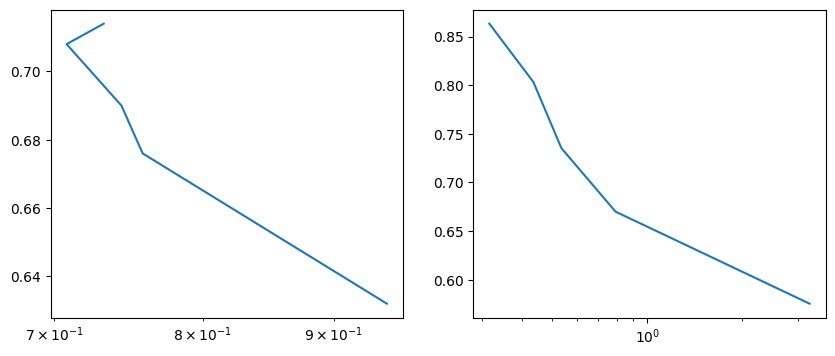

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2, figsize=(10, 4))

plt.subplot(1,2,1)
plt.semilogx(hist['val_loss'],hist['val_accuracy'])
plt.subplot(1,2,2)
plt.semilogx(hist['loss'],hist['accuracy'])

In [ ]:
epochs = range(len(hist['val_loss']))

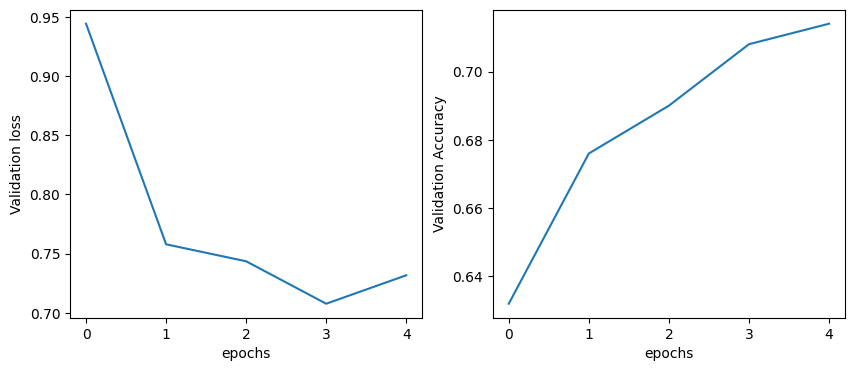

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))

plt.subplot(1,2,1)
plt.xlabel('epochs')
plt.ylabel('Validation loss')
plt.plot(epochs, hist['val_loss'])
plt.subplot(1,2,2)
plt.xlabel('epochs')
plt.ylabel('Validation Accuracy')
plt.plot(epochs, hist['val_accuracy'])

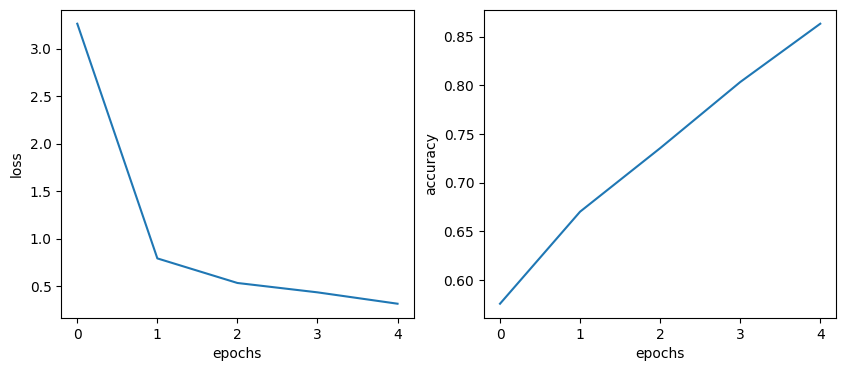

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
plt.subplot(1,2,1)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(epochs, hist['loss'])
plt.subplot(1,2,2)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(epochs, hist['accuracy'])

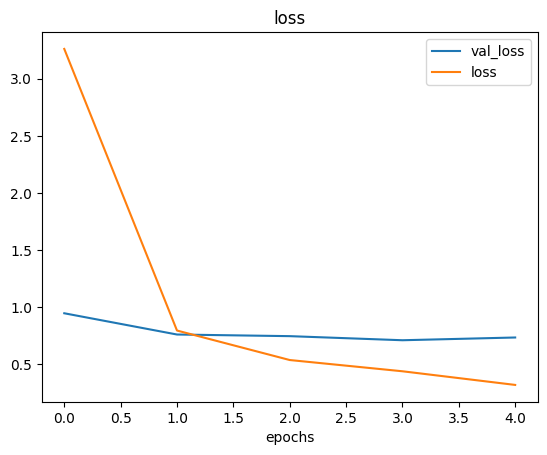

In [ ]:
plt.plot(epochs, hist['val_loss'], label='val_loss')
plt.plot(epochs, hist['loss'],label='loss')
plt.title('loss')
plt.xlabel('epochs')
plt.legend()

If there is a large gap b/w val_loss and the train loss then it probably means that model is underfitting or overfitting.

Text(0.5, 0, 'epochs')

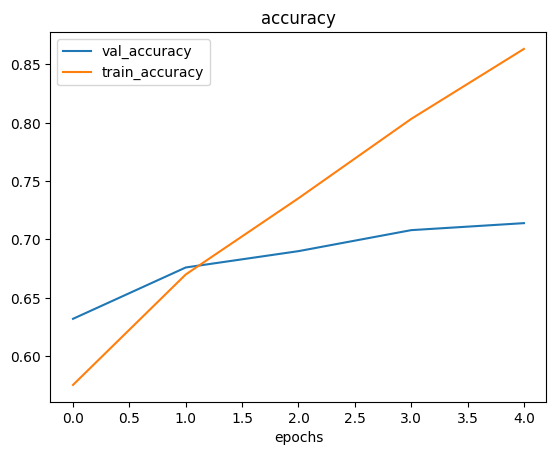

In [ ]:
plt.plot(epochs, hist['val_accuracy'], label = 'val_accuracy')
plt.plot(epochs, hist['accuracy'], label = 'train_accuracy')
plt.title('accuracy')
plt.legend()
plt.xlabel('epochs')

Fitting comes in 3 steps

1. Prepare the baseline model
2. Beat the baseline by overfitting
3. Reduce overfitting

Ways to induce overfitting:

* Increase Convolutional layers
* Increase Convolutional filters
* Add another dense layer

Ways to reduce overfitting:

* Add data augmentation
* Add regularization layers(MaxPool2D)
* Add more data..

In [ ]:
model_1 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [ ]:
model_1.compile(loss=binary_crossentropy,
                optimizer=Adam(),
                metrics=['accuracy'])

history_1 = model_1.fit(train_images,
          epochs=5,
          steps_per_epoch=len(train_images),
          validation_data=test_images,
          validation_steps=len(test_images),
          )

Epoch 1/5
47/47 [==============================] - 17s 266ms/step - loss: 0.8785 - accuracy: 0.5560 - val_loss: 0.6466 - val_accuracy: 0.6260
Epoch 2/5
47/47 [==============================] - 11s 235ms/step - loss: 0.5995 - accuracy: 0.6747 - val_loss: 0.5940 - val_accuracy: 0.6920
Epoch 3/5
47/47 [==============================] - 11s 232ms/step - loss: 0.5314 - accuracy: 0.7433 - val_loss: 0.4755 - val_accuracy: 0.7780
Epoch 4/5
47/47 [==============================] - 11s 220ms/step - loss: 0.5012 - accuracy: 0.7720 - val_loss: 0.4717 - val_accuracy: 0.7640
Epoch 5/5
47/47 [==============================] - 11s 237ms/step - loss: 0.4581 - accuracy: 0.7880 - val_loss: 0.4112 - val_accuracy: 0.8240


In [ ]:
model_1.evaluate(test_images)

16/16 [==============================] - 2s 147ms/step - loss: 0.4112 - accuracy: 0.8240


[0.41118884086608887, 0.8240000009536743]

In [ ]:
hist_1 = history_1.history

In [ ]:
def plot_loss_curves(history):
  epochs = range(len(history['loss']))
  # plotting loss curves
  val_loss = history['val_loss']
  train_loss = history['loss']

  plt.plot(epochs, val_loss, label = 'validation_loss')
  plt.plot(epochs, train_loss, label = 'train_loss')
  plt.title('Loss Curve')
  plt.xlabel('epochs')
  plt.legend()
  plt.show()

In [ ]:
def plot_accuracy_curves(history):
  epochs = range(len(history['loss']))
  # plotting loss curves
  val_accuracy = history['val_accuracy']
  train_accuracy = history['accuracy']

  plt.plot(epochs, val_accuracy, label = 'validation_accuracy')
  plt.plot(epochs, train_accuracy, label = 'train_accuracy')
  plt.title('Accuracy Curve')
  plt.xlabel('epochs')
  plt.legend()
  plt.show()

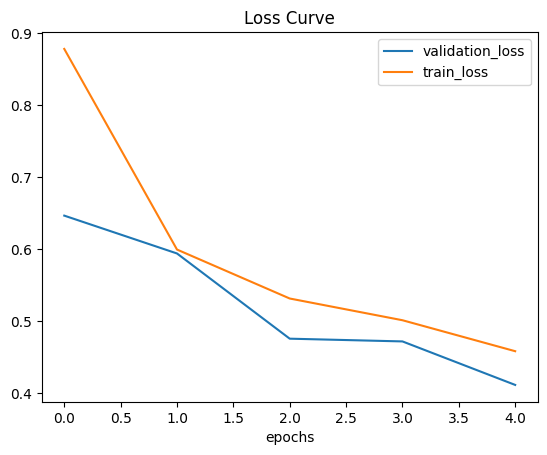

In [ ]:
plot_loss_curves(hist_1)

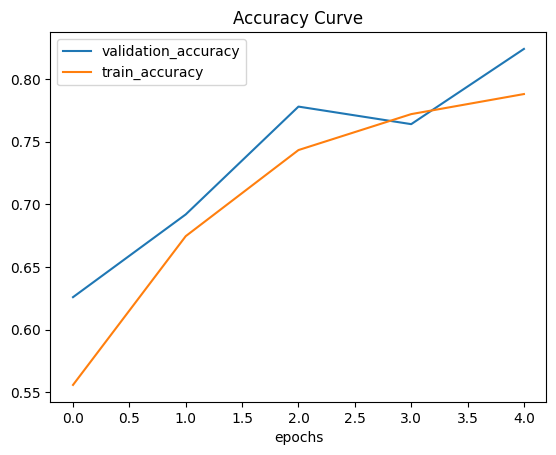

In [ ]:
plot_accuracy_curves(hist_1)

The validation accuracy in this plot seems to be higher as compared to baseline model


In [ ]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_4 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

Here the trainable parameters are less as compared to baseline model and this model outperforms the previous one

In [ ]:
preds = model_1.predict(test_images)

16/16 [==============================] - 3s 165ms/step


In [ ]:
true = test_images.next()
len(true[1])

32

In [ ]:
preds = np.ravel(np.around(preds))

In [ ]:
preds

array([1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 1.

In [ ]:
r = []
for i in range( test_images.__len__() ):
    r.extend(
        test_images.__getitem__( i )[1]
        )

In [ ]:
np.count_nonzero(r - preds)

262

In [ ]:
274/500

0.548

In [ ]:
generator = ImageDataGenerator(rescale=1./255)

In [ ]:
gen_augmented = ImageDataGenerator(rescale=1./255,
                                   rotation_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.3,
                                   horizontal_flip=True)

In [ ]:
train_images_augmented = gen_augmented.flow_from_directory(directory=train_dir,
                                                 seed=42,
                                                 target_size=(224,224),
                                                 class_mode='binary',
                                                 batch_size=32,
                                                 shuffle=True)
test_images_augmented = gen_augmented.flow_from_directory(directory=test_dir,
                                                 seed=42,
                                                 target_size=(224,224),
                                                 class_mode='binary',
                                                batch_size=32,
                                                shuffle=True)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
train_images = generator.flow_from_directory(directory=train_dir,
                                                 seed=42,
                                                 target_size=(224,224),
                                                 class_mode='binary',
                                                 batch_size=32,
                                                 shuffle=False)
test_images = generator.flow_from_directory(directory=test_dir,
                                                 seed=42,
                                                 target_size=(224,224),
                                                 class_mode='binary',
                                                batch_size=32,
                                                shuffle=False)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_images.next()
augmented_images, augmented_labels = train_images_augmented.next()

In [ ]:
import random

image number 27


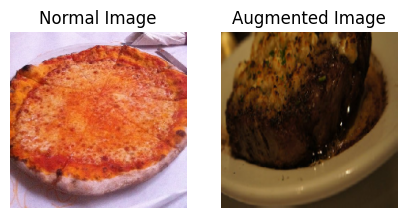

In [ ]:
random_number = random.randint(0, 32)
print(f"image number {random_number}")
fig, ax = plt.subplots(ncols=2, figsize=(5, 4))
plt.subplot(1,2,1)
plt.title("Normal Image")
plt.imshow(images[random_number])
plt.axis("off")
plt.subplot(1,2,2)
plt.title("Augmented Image")
plt.imshow(augmented_images[random_number])
plt.axis("off")
plt.show()

In [ ]:
model_2 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,'sigmoid')
])

model_2.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=['accuracy'])

hist_2 = model_2.fit(train_images_augmented,
                     steps_per_epoch=len(train_images_augmented),
                     epochs=5,
                     validation_data=test_images_augmented,
                     validation_steps=len(test_images_augmented))

Epoch 1/5
47/47 [==============================] - 38s 771ms/step - loss: 0.6714 - accuracy: 0.5893 - val_loss: 0.6448 - val_accuracy: 0.6620
Epoch 2/5
47/47 [==============================] - 30s 640ms/step - loss: 0.6188 - accuracy: 0.6660 - val_loss: 0.5316 - val_accuracy: 0.7400
Epoch 3/5
47/47 [==============================] - 32s 683ms/step - loss: 0.5522 - accuracy: 0.7307 - val_loss: 0.4933 - val_accuracy: 0.7760
Epoch 4/5
47/47 [==============================] - 30s 646ms/step - loss: 0.5252 - accuracy: 0.7453 - val_loss: 0.4984 - val_accuracy: 0.7560
Epoch 5/5
47/47 [==============================] - 30s 631ms/step - loss: 0.4995 - accuracy: 0.7700 - val_loss: 0.4342 - val_accuracy: 0.8020


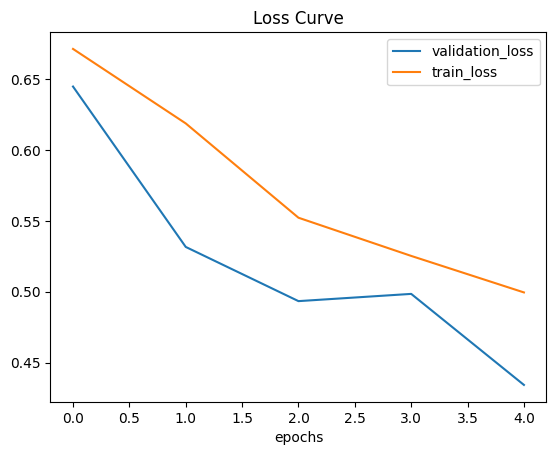

In [ ]:
plot_loss_curves(hist_2.history)

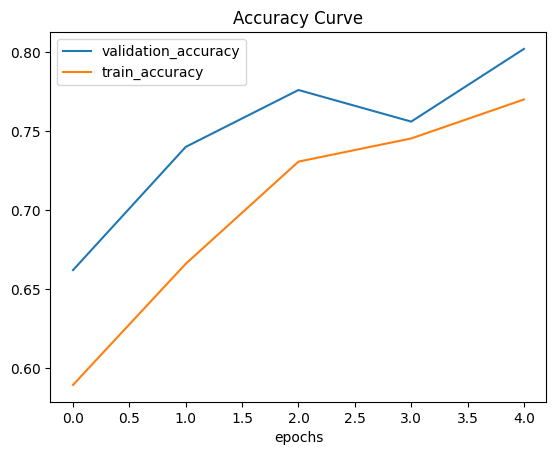

In [ ]:
plot_accuracy_curves(hist_2.history)

In [ ]:
model_2.evaluate(test_images)

16/16 [==============================] - 4s 243ms/step - loss: 0.3739 - accuracy: 0.8460


[0.37387990951538086, 0.8460000157356262]

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg


--2023-06-19 04:50:45--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.04s   

2023-06-19 04:50:45 (48.5 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



In [ ]:
import matplotlib.image as mpimg

steak = mpimg.imread('/content/03-steak.jpeg')

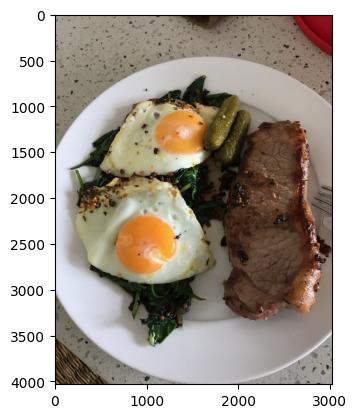

In [ ]:
plt.imshow(steak)

In [ ]:
expanded_steak = tf.expand_dims(steak, axis=0)

In [ ]:
def read_and_preprocess_image(filename, img_shape=224):
  img = tf.io.read_file(filename=filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size=[img_shape, img_shape])
  img = img/255.
  img = tf.expand_dims(img, axis=0)
  return img

In [ ]:
steak = read_and_preprocess_image('/content/03-steak.jpeg')

In [ ]:
model_2.predict(steak)

1/1 [==============================] - 0s 180ms/step


array([[0.8318565]], dtype=float32)

In [ ]:
def visualize_image(img):
  tag = model_2.predict(img)
  tag = np.ravel(np.around(tag))
  print('pizza') if tag[0] == 0 else print('steak')
  img = tf.squeeze(img)
  plt.figure(figsize=(5, 4))
  plt.imshow(img)
  plt.axis("off")

1/1 [==============================] - 0s 18ms/step
steak


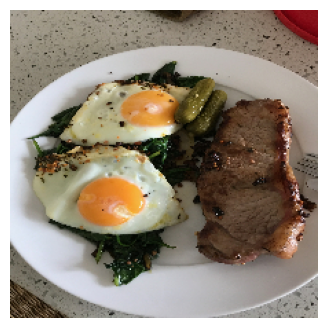

In [ ]:
visualize_image(steak)

In [ ]:
pizza = read_and_preprocess_image('/content/pizza.jpeg')

1/1 [==============================] - 0s 90ms/step
pizza


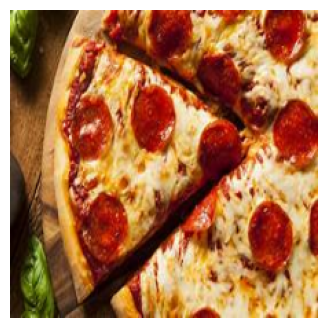

In [ ]:
visualize_image(pizza)

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

In [ ]:
pizza_dad = read_and_preprocess_image('/content/03-pizza-dad.jpeg')

1/1 [==============================] - 0s 19ms/step
steak


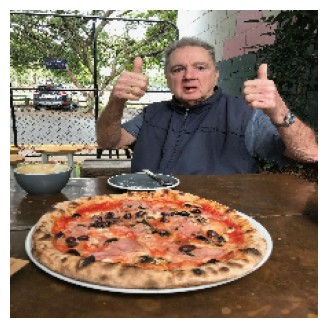

In [ ]:
visualize_image(pizza_dad)

Multiclass Image Classification

1. becoming one with the data
2. preprocess for the data
3. create a model
4. fit the model
5. evaluate the model
6. adjust different hyperparameters (augmentation, pooling, etc.)
7. repeat until satisfied